In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

df_seattle = pd.read_csv('/Users/carterwebb/Desktop/5301_Foundation_Data/weather_5301_Webb/weather/data/seattle_rain.csv')

df_van = pd.read_csv('/Users/carterwebb/Desktop/5301_Foundation_Data/weather_5301_Webb/weather/data/van_rain.csv')


Lets clean the data starting with ensuring our data and time columns are in a usable format; specifically, to datetime objects. 

In [2]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

df_van['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/7s/t5l3pg4j2j54njys9zrdzdxr0000gn/T/ipykernel_23776/3845985642.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


Lets check to make sure it worked. 

In [3]:
print(df_seattle)
print(df_van)

          STATION                    NAME       DATE  DAPR  MDPR  PRCP  SNOW  \
0     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-01   NaN   NaN  0.00   NaN   
1     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-02   NaN   NaN  0.00   NaN   
2     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-03   NaN   NaN  0.00   NaN   
3     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-04   NaN   NaN  0.00   NaN   
4     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-05   NaN   NaN  0.25   NaN   
...           ...                     ...        ...   ...   ...   ...   ...   
1653  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-27   NaN   NaN  0.78   NaN   
1654  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-28   NaN   NaN  0.40   NaN   
1655  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-29   NaN   NaN  0.03   NaN   
1656  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-30   NaN   NaN  0.62   NaN   
1657  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-31   NaN   NaN  0.17   NaN   

      SNWD  WESD  WESF  
0      NaN   N

Lets also make sure these data sets make sense visually. 

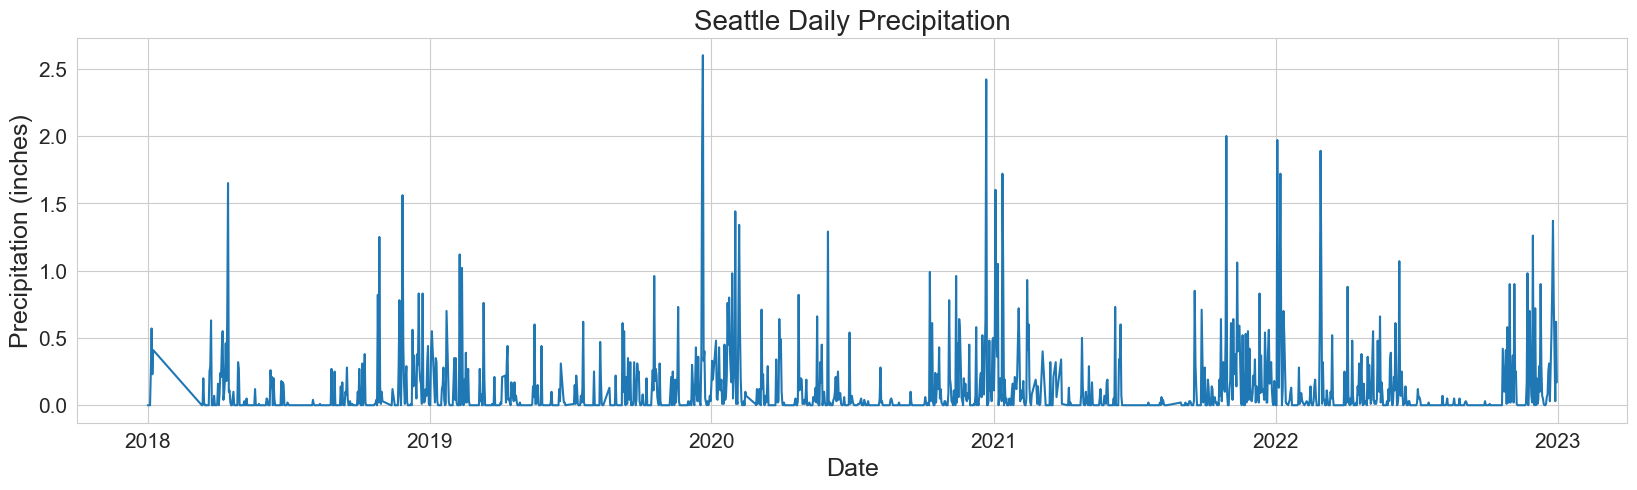

In [4]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Seattle Daily Precipitation', fontsize=20)

plt.tick_params(labelsize=15)

plt.show()

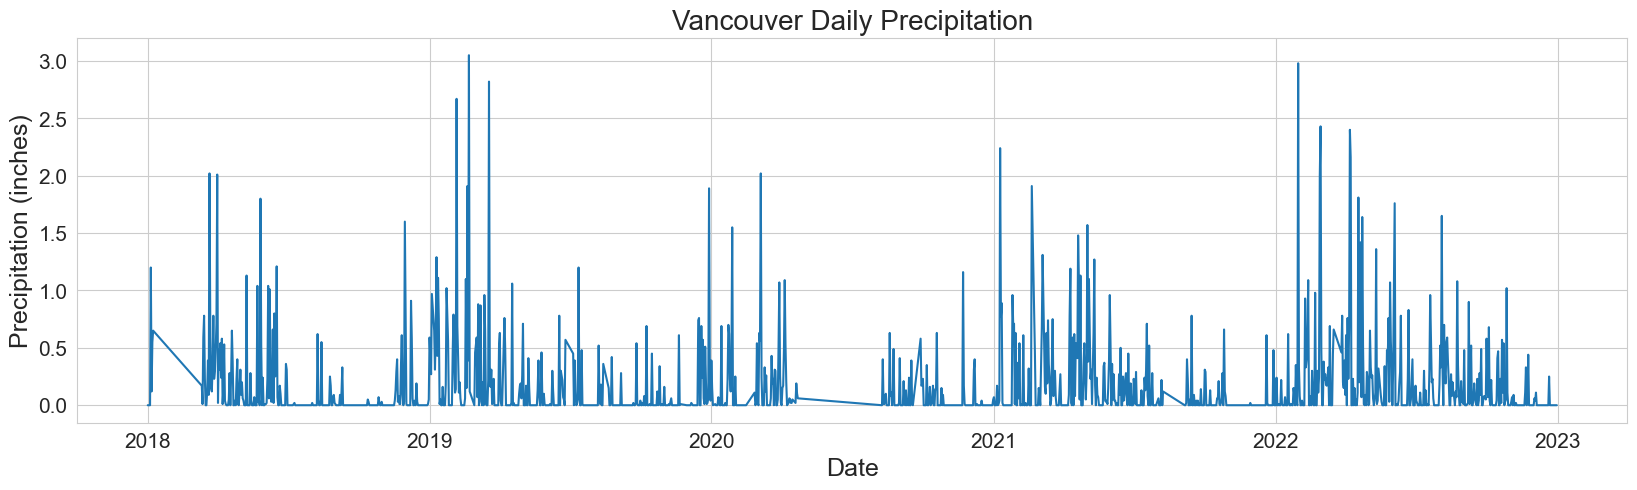

In [5]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_van, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Vancouver Daily Precipitation', fontsize=20)


plt.tick_params(labelsize=15)

plt.show()

Ok! Lets continue with the cleaning by selecting with just the data we will need using the .loc() method, wich allows us to to select columns (or rows) with explicit indexing.  

In [6]:
df_van_loc = df_van.loc[:, ['STATION', 'DATE', 'PRCP']]
df_van_loc.head()

,STATION,DATE,PRCP
0,CA001108446,2018-01-01,0.0
1,CA001108446,2018-01-02,0.0
2,CA001108446,2018-01-03,0.0
3,CA001108446,2018-01-04,0.0
4,CA001108446,2018-01-05,1.2


In [7]:
df_sea_loc = df_seattle.loc[:, ['STATION', 'DATE', 'PRCP']]
df_sea_loc.head()

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25


Now checking to make sure we wre successful. 

In [8]:
print(df_sea_loc)
print(df_van_loc)

          STATION       DATE  PRCP
0     US1WAKG0225 2018-01-01  0.00
1     US1WAKG0225 2018-01-02  0.00
2     US1WAKG0225 2018-01-03  0.00
3     US1WAKG0225 2018-01-04  0.00
4     US1WAKG0225 2018-01-05  0.25
...           ...        ...   ...
1653  US1WAKG0225 2022-12-27  0.78
1654  US1WAKG0225 2022-12-28  0.40
1655  US1WAKG0225 2022-12-29  0.03
1656  US1WAKG0225 2022-12-30  0.62
1657  US1WAKG0225 2022-12-31  0.17

[1658 rows x 3 columns]
          STATION       DATE  PRCP
0     CA001108446 2018-01-01  0.00
1     CA001108446 2018-01-02  0.00
2     CA001108446 2018-01-03  0.00
3     CA001108446 2018-01-04  0.00
4     CA001108446 2018-01-05  1.20
...           ...        ...   ...
1791  CA001108446        NaT  1.46
1792  CA001108446        NaT  0.24
1793  CA001108446        NaT  0.17
1794  CA001108446        NaT  0.72
1795  CA001108446        NaT  0.13

[1796 rows x 3 columns]


Ok! Lets continue with an outer join using the .merg function via the pandas package where the left (df_van) will be assigned the x variable and the right (df_seattle) the y variable. An outer join will ensure that null values (NaNs & NaTs) will still be present in our data set. 

In [9]:
df = df_van[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

Checking out work. 

In [10]:
df

,DATE,PRCP_x,PRCP_y
0,NaT,0.0,NaN
1,NaT,0.0,NaN
2,NaT,0.0,NaN
3,NaT,0.0,NaN
4,NaT,0.0,NaN
...,...,...,...
1791,2022-12-27,0.0,0.78
1792,2022-12-28,0.0,0.40
1793,2022-12-29,0.0,0.03
1794,2022-12-30,0.0,0.62


We can see we have a bit of an odd problem where the Vancouver data set had percipitation values listed without dates. Through some exploration with the .head() method, we can see how many rows had these values. 

In [11]:
df.head(140)

,DATE,PRCP_x,PRCP_y
0,NaT,0.00,NaN
1,NaT,0.00,NaN
2,NaT,0.00,NaN
3,NaT,0.00,NaN
4,NaT,0.00,NaN
...,...,...,...
135,NaT,0.17,NaN
136,NaT,0.72,NaN
137,NaT,0.13,NaN
138,2018-01-01,0.00,0.0


Since we have little hope of recovering these dates without returning to the data collection phase, let us simple ommitt these for the time being. We will thus select only the rows after these values. 

In [12]:
df = df.iloc[138:]

Lets begin the "tidying" process by making each row a single observation. 

In [13]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

Now renaiming our city markers with more useful labels. 

In [14]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'VAN'

df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

Checking

In [15]:
df

,DATE,city,precipitation
0,2018-01-01,VAN,0.00
1,2018-01-02,VAN,0.00
2,2018-01-03,VAN,0.00
3,2018-01-04,VAN,0.00
4,2018-01-05,VAN,1.20
...,...,...,...
3311,2022-12-27,SEA,0.78
3312,2022-12-28,SEA,0.40
3313,2022-12-29,SEA,0.03
3314,2022-12-30,SEA,0.62


Cleaning up column names. 

In [16]:
df = df.rename(columns={'DATE': 'date'})

df.head()

,date,city,precipitation
0,2018-01-01,VAN,0.0
1,2018-01-02,VAN,0.0
2,2018-01-03,VAN,0.0
3,2018-01-04,VAN,0.0
4,2018-01-05,VAN,1.2


Let us figure out how many null values made it to this point; both in general and by city marker. 

In [17]:
df.isna().sum()

date               0
city               0
precipitation    145
dtype: int64

In [18]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(22)

In [19]:
df.loc[df['city'] == 'VAN', 'precipitation'].isna().sum()

np.int64(123)

Begining the process of imputing these missing values, lets create a new column that allows us to reference the date of the year. 

In [20]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

Lets now make an mean for each date of the year for the two cities. 

In [21]:
mean_day_precipitation_sea = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

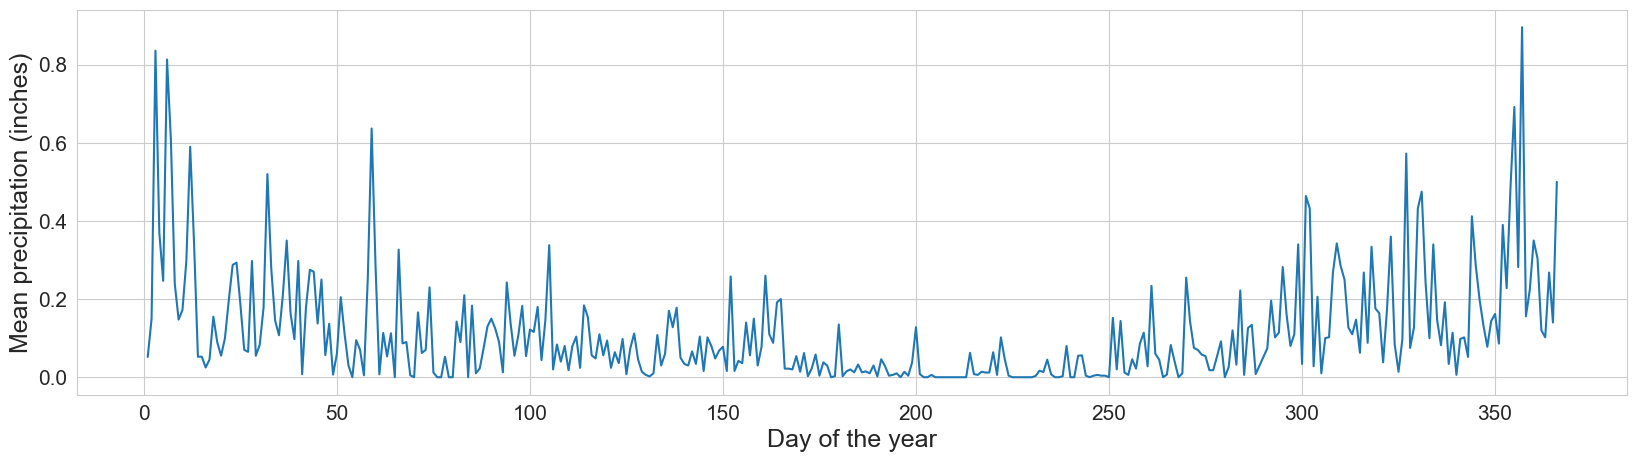

In [22]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_sea, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

In [23]:
mean_day_precipitation_van = df.loc[
    df['city'] == 'VAN',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

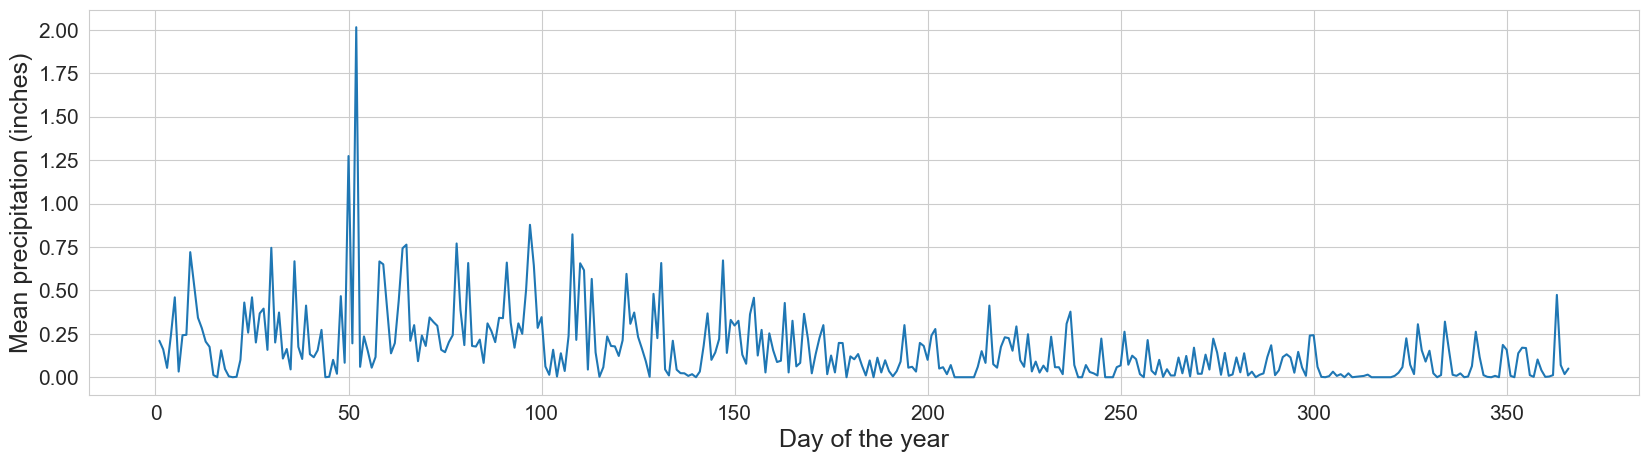

In [24]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_van, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

Now lets make the other half of this imputing process by IDing each NaN value by city and create a new pair of data frames for use in the next step. 

In [25]:
indices_SEA = np.where(df['precipitation'].isna() & (df['city'] == 'SEA'))[0]

indices_VAN = np.where(df['precipitation'].isna() & (df['city'] == 'VAN'))[0]

Let us ensure we caught all NaNs

In [26]:
indices_SEA.shape

(22,)

In [27]:
indices_VAN.shape

(123,)

It adds up to 145 as expected from the previous inquiry. 

Lets impute using a for loop for each city. 

In [28]:
for index in indices_SEA:
    df.loc[index, 'precipitation'] = mean_day_precipitation_sea.loc[df.loc[index,'day_of_year']].values[0]

In [29]:
for index in indices_VAN:
    df.loc[index, 'precipitation'] = mean_day_precipitation_van.loc[df.loc[index,'day_of_year']].values[0]

Checking

In [30]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

We did it, we can now continue forward with data exploration, analysis, and modeling. 

In [31]:
df.to_csv('clean_seattle_vancouver_weather.csv', encoding='utf-8-sig', index=False)

In [32]:
df_tidy= pd.read_csv('/Users/carterwebb/Desktop/5301_Foundation_Data/weather_5301_Webb/weather/data/clean_seattle_vancouver_weather.csv')


In [33]:
df_tidy

,date,city,precipitation,day_of_year
0,2018-01-01,VAN,0.00,1
1,2018-01-02,VAN,0.00,2
2,2018-01-03,VAN,0.00,3
3,2018-01-04,VAN,0.00,4
4,2018-01-05,VAN,1.20,5
...,...,...,...,...
3311,2022-12-27,SEA,0.78,361
3312,2022-12-28,SEA,0.40,362
3313,2022-12-29,SEA,0.03,363
3314,2022-12-30,SEA,0.62,364


Sanity check time using a visual. 

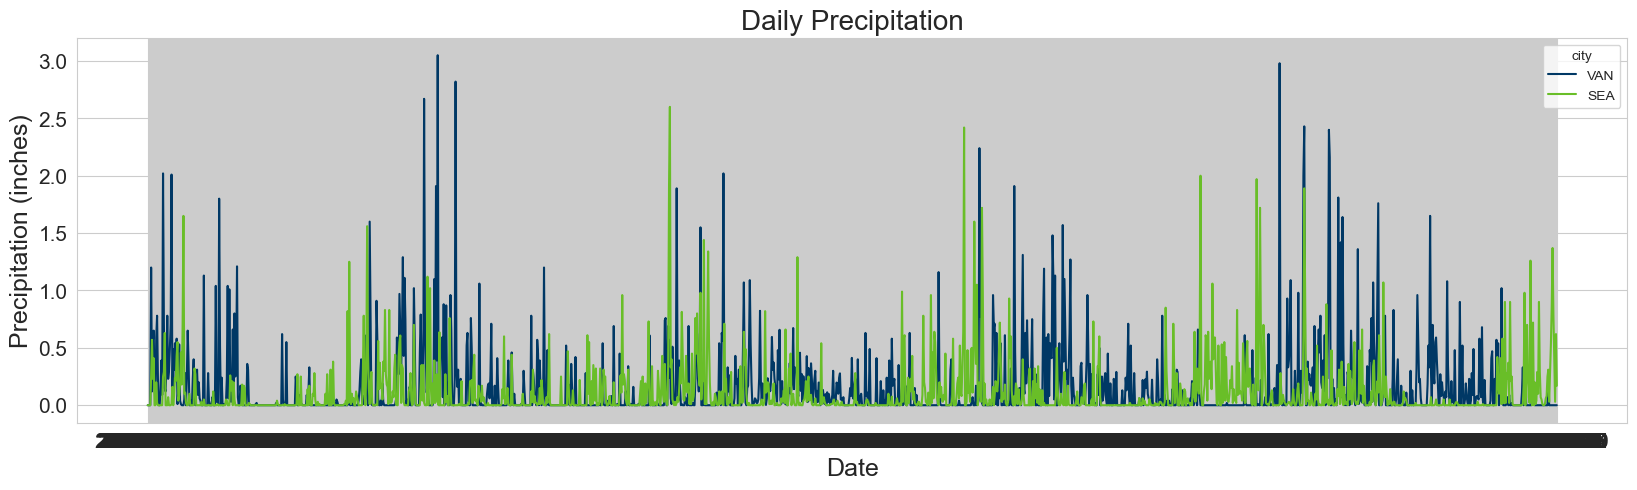

In [35]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_tidy, x='date', y='precipitation', hue='city',
    palette=["#003865", "#69BE28"] 
)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Daily Precipitation', fontsize=20)

plt.tick_params(labelsize=15)

plt.show()

Our first summary plot to compare overall Means.

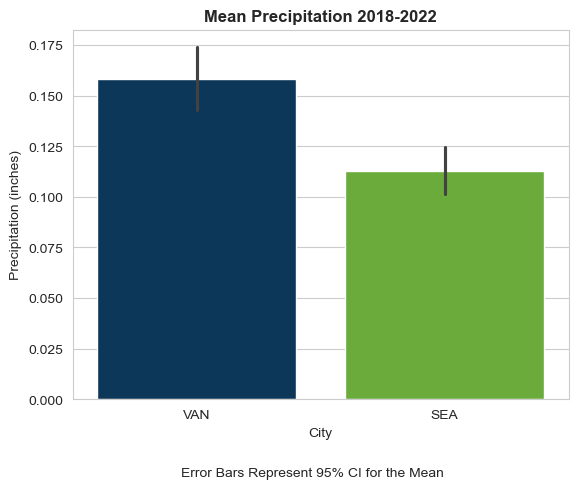

In [37]:
plt.figure()

sns.barplot(
    data=df_tidy, x='city', y='precipitation', hue = 'city',
    palette=["#003865", "#69BE28"] 
)

plt.xlabel('City')
plt.ylabel('Precipitation (inches)')
plt.title('Mean Precipitation 2018-2022', fontweight="bold")

plt.tick_params()

plt.figtext(
    0.5, -0.05,
    "Error Bars Represent 95% CI for the Mean",
    ha="center"
)


plt.show()

Lets make a new column so we can plot by month. 

In [38]:
df_tidy['month'] = pd.DatetimeIndex(df['date']).month

Lets also make another column that uses a bool operator to see how mnay dates have a "Rainy Day"

In [39]:
df_tidy['any_precipitation'] = df['precipitation'] >0

Checking

In [40]:
df_tidy

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,VAN,0.00,1,1,False
1,2018-01-02,VAN,0.00,2,1,False
2,2018-01-03,VAN,0.00,3,1,False
3,2018-01-04,VAN,0.00,4,1,False
4,2018-01-05,VAN,1.20,5,1,True
...,...,...,...,...,...,...
3311,2022-12-27,SEA,0.78,361,12,True
3312,2022-12-28,SEA,0.40,362,12,True
3313,2022-12-29,SEA,0.03,363,12,True
3314,2022-12-30,SEA,0.62,364,12,True


Lets visualize this.

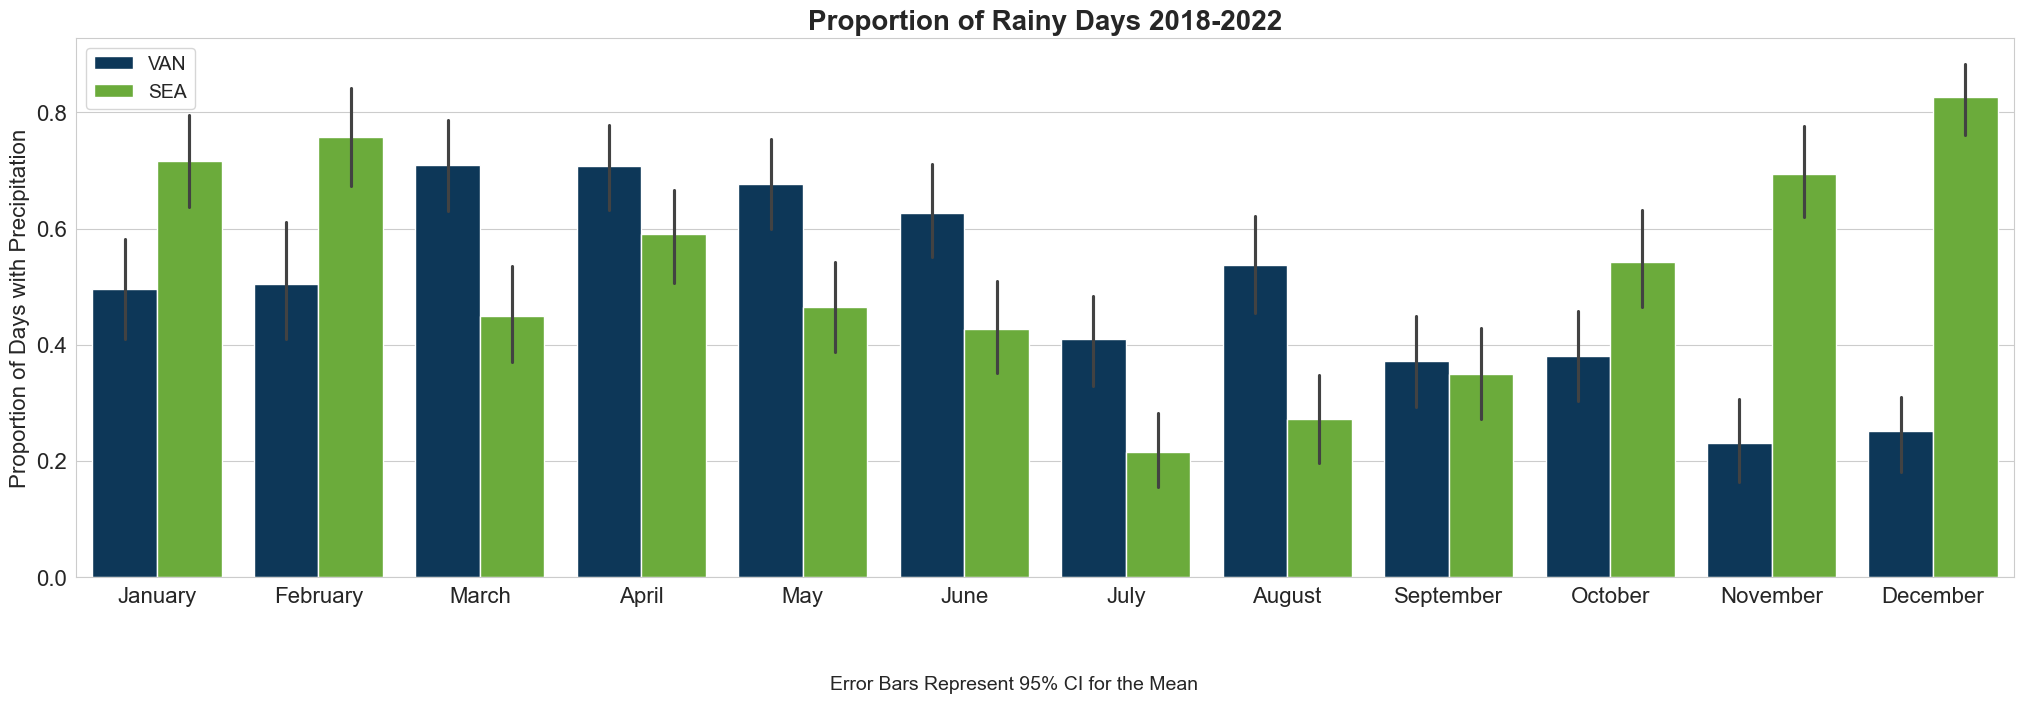

In [42]:
plt.figure(figsize=(25,7))

sns.barplot(data=df_tidy, x='month', y='any_precipitation', hue = 'city',
           palette=["#003865", "#69BE28"] )

plt.xlabel(None)
plt.ylabel('Proportion of Days with Precipitation', fontsize=16)
plt.title('Proportion of Rainy Days 2018-2022', fontsize=20, fontweight="bold")

plt.tick_params(labelsize=16)

import calendar #this needs to happen before being able to name the months or else it will just call the numbers.
month_names = list(calendar.month_name[1:]) 
plt.xticks(ticks=range(12), labels=month_names)

plt.xticks(ticks=range(12), labels=month_names)

plt.figtext(0.5, -0.05,
            "Error Bars Represent 95% CI for the Mean",
            ha="center", fontsize=14)

plt.legend(
    title=None,
    fontsize=14,        
    markerscale=1.3     
)

plt.show()

Lets do some modeling with a t-test.

In [43]:
from scipy import stats

In [44]:
significance_level = 0.05
significantly_different = np.zeros(12)

for month in range(1, 13):
    sea_data = df_tidy.loc[(df_tidy['city'] == 'SEA') & (df_tidy['month'] == month), 'precipitation'] 
    van_data = df_tidy.loc[(df_tidy['city'] == 'VAN') & (df_tidy['month'] == month), 'precipitation'] 

    t_statistic, p_value = stats.ttest_ind(sea_data, van_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f" t_statistic = {t_statistic:.2f}:")
    print(f" p_value t test = {p_value:.3f}:")
    print("-" * 20)

Month 1:
 t_statistic = 0.00:
 p_value t test = 0.998:
--------------------
Month 2:
 t_statistic = -1.38:
 p_value t test = 0.169:
--------------------
Month 3:
 t_statistic = -5.16:
 p_value t test = 0.000:
--------------------
Month 4:
 t_statistic = -4.51:
 p_value t test = 0.000:
--------------------
Month 5:
 t_statistic = -4.81:
 p_value t test = 0.000:
--------------------
Month 6:
 t_statistic = -4.03:
 p_value t test = 0.000:
--------------------
Month 7:
 t_statistic = -4.18:
 p_value t test = 0.000:
--------------------
Month 8:
 t_statistic = -5.07:
 p_value t test = 0.000:
--------------------
Month 9:
 t_statistic = -0.78:
 p_value t test = 0.436:
--------------------
Month 10:
 t_statistic = 1.69:
 p_value t test = 0.092:
--------------------
Month 11:
 t_statistic = 4.83:
 p_value t test = 0.000:
--------------------
Month 12:
 t_statistic = 4.29:
 p_value t test = 0.000:
--------------------


Lets do some visualizing of what this means. 

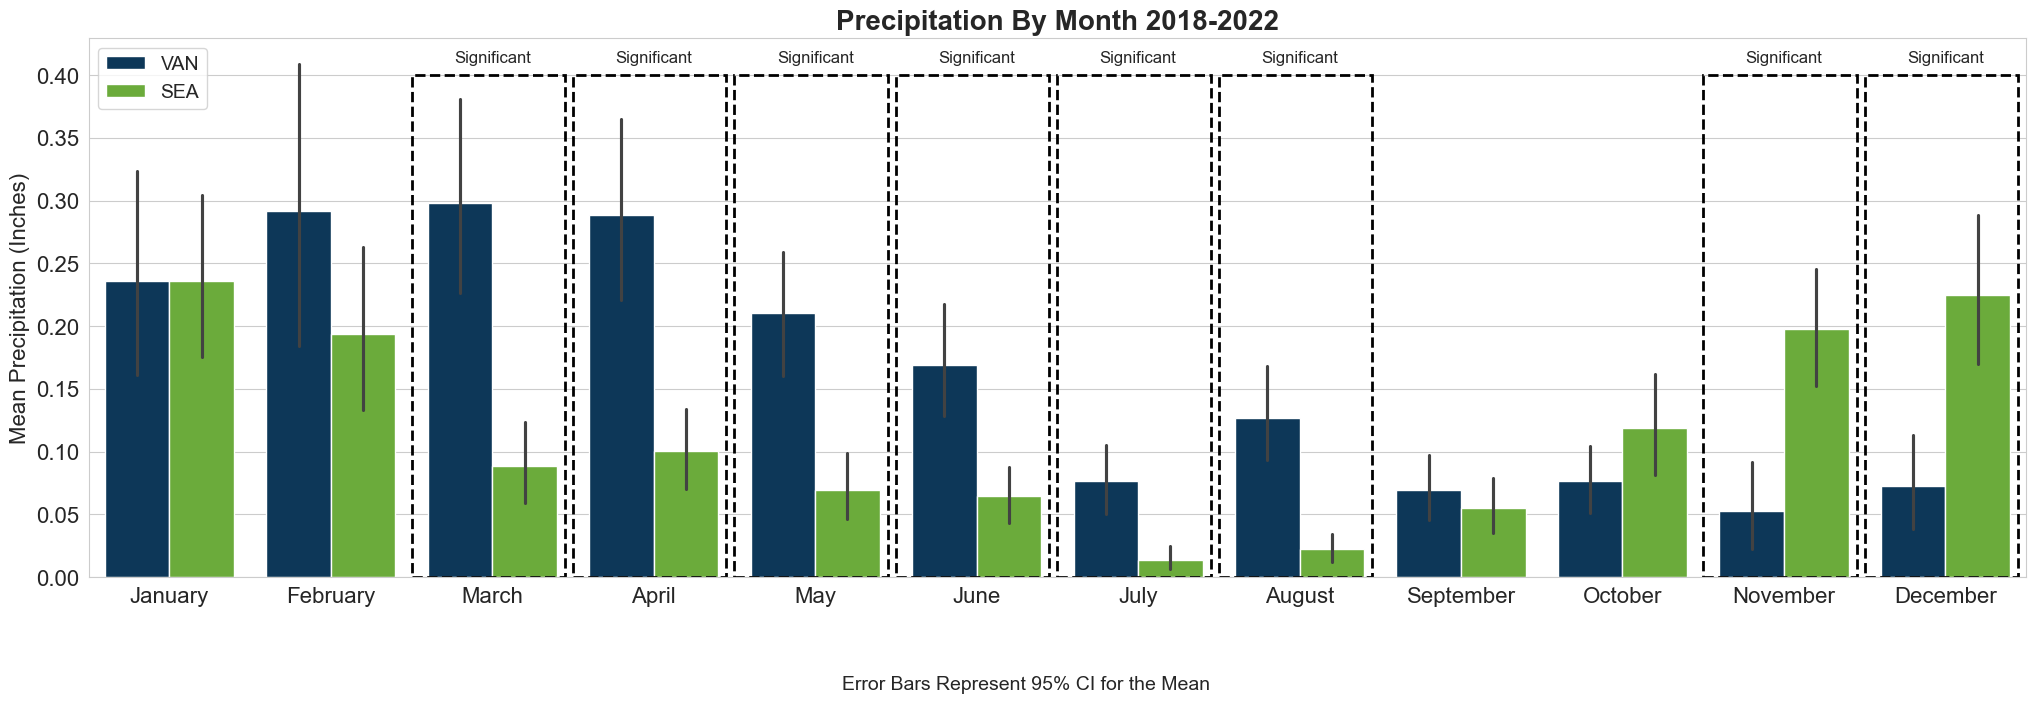

In [48]:
plt.figure(figsize=(25,7))

sns.barplot(data=df_tidy, x='month', y='precipitation', hue = 'city',
           palette=["#003865", "#69BE28"] )

plt.xlabel(None)
plt.ylabel('Mean Precipitation (Inches)', fontsize=16)
plt.title('Precipitation By Month 2018-2022', fontsize=20, fontweight="bold")

plt.tick_params(labelsize=16)

plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
   if significantly_different[month] == 1:

        plt.text(month, 0.41, 'Significant', ha='center', fontsize=12)

plt.figtext(0.5, -0.05,
            "Error Bars Represent 95% CI for the Mean",
            ha="center", fontsize=14)

for month in range(12):
    if significantly_different[month] == 1:
        # add a dotted rectangle around that month’s bars
        rect = plt.Rectangle(
            (month - 0.5, 0),  
            0.95,              
            0.40, 
            linewidth=2, edgecolor="black", facecolor="none", linestyle="--"
        )
        plt.gca().add_patch(rect)

plt.legend(
    title=None,
    fontsize=14,        
    markerscale=1.3     
)

plt.show()

We have some good information to now make some claims about the weather diferences of these two cities!